<a href="https://colab.research.google.com/github/Aromer9/deeplearning_study/blob/main/Lab_2_Entrenando_red_feed_forward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrenado redes Feed-Forward

Usaremos keras para de manera muy fácil entrenar redes feed-forward usando descenso estocástico de  gradiente.

In [15]:
# Importamos librerías necesarias
from tensorflow import keras
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [16]:
# Setamos los seed para números random

np.random.seed(30)
tf.random.set_seed(30)

In [17]:
# Cargamos los datos de entrenamiento de MNIST

(imgs, labs), _ = keras.datasets.mnist.load_data()
print(imgs.shape)
print(labs.shape)

(60000, 28, 28)
(60000,)


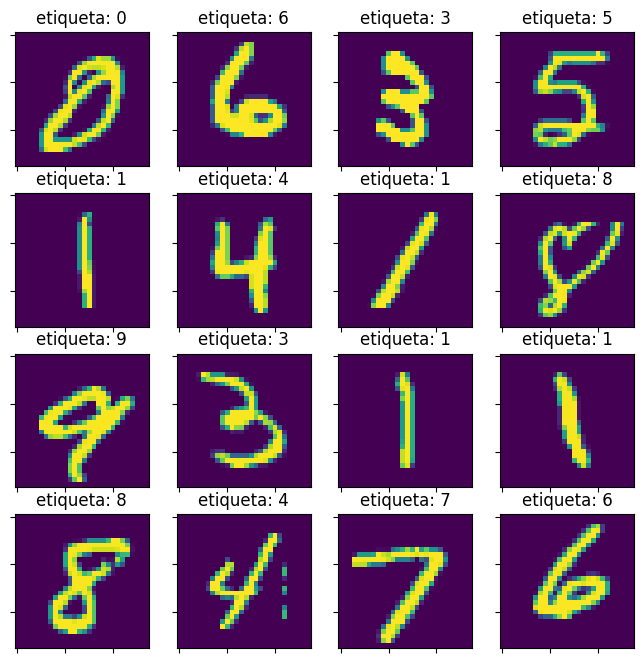

In [18]:
# Mostramos una grilla de ejemplos (al azar)

h = 4 # alto de la grilla
w = 4 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(2*h,2*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs))
    axs[i,j].set_title("etiqueta: " + str(labs[ex]))
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].grid(False)
    axs[i,j].imshow(imgs[ex])

In [19]:
# Tranformamos los datos para el entrenamiento

# los X's los cambiamos a vectores de una dimension
# y luego normalizamos
X = imgs.reshape(60000,28*28)
X = X / 255
print(X.shape)

# los Y's los cambiamos a vectores de 10 componentes (one-hot)
Y = keras.utils.to_categorical(labs, 10)
print(Y.shape)

(60000, 784)
(60000, 10)


In [20]:
# cantidad de ejemplos, neuronas de entrada y neuronas de salida

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M,N,C)

60000 784 10


In [21]:
# tamaños de capas escondidas

h1 = 64
h2 = 32

In [22]:
# nuestra red feed-forward

red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

red.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Ahora compilamos la red para poder entrenar (con .compile)
# Necesitamos definir
#   - la pérdida ("loss"), en nuestro caso, "categorical_crossentropy"
#   - el algoritmo de optimización ("optimizer"), en nuestro caso "sgd"
# También podemos agregar una lista de métrics ("metrics").
# Agregamos "accuracy"

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [11]:
# Entrenamos simplemente haciendo .fit y entregando los inputs
# Podemos definir también la cantidad de épocas ("epochs"),
# el tamaño del paquete de entrenamiento ("batch_size"),
# y otros parámetros que veremos más adelante.
# Guardamos el resultado en una variable para analizar.
#5 epocas por default
h = red.fit(X, Y, epochs=15, batch_size=20)

Epoch 1/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7008 - loss: 1.0247
Epoch 2/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9186 - loss: 0.2874
Epoch 3/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9369 - loss: 0.2225
Epoch 4/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9470 - loss: 0.1841
Epoch 5/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9549 - loss: 0.1576
Epoch 6/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9603 - loss: 0.1379
Epoch 7/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9653 - loss: 0.1226
Epoch 8/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9690 - loss: 0.1101
Epoch 9/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9720 - loss: 0.1000
Epoch 10/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9742 - loss: 0.0915
Epoch 11/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9764 - loss: 0.0842
Epoch 12/15
3000/3000 ━━━

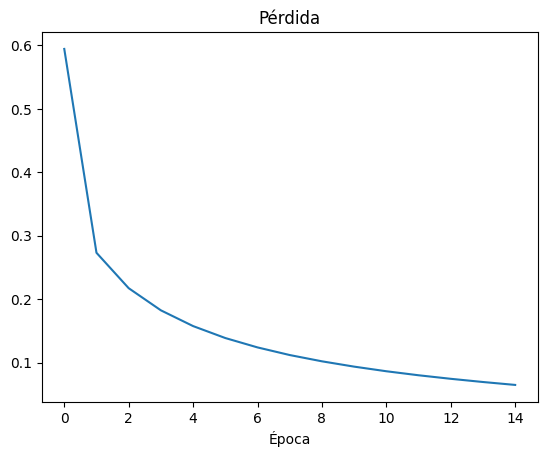

In [12]:
# imprime la pérdida para cada época

plt.plot(h.history['loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()


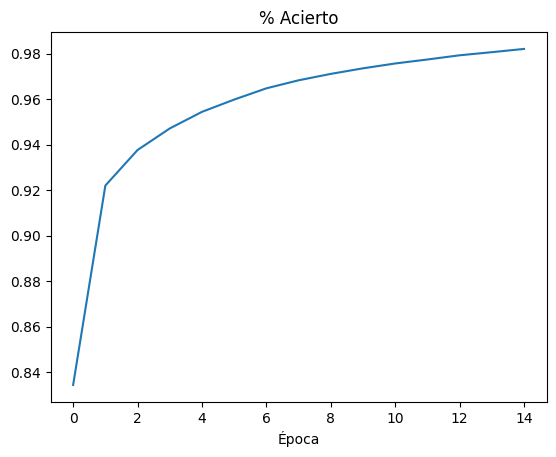

In [13]:
# imprime el porcentaje de acierto para cada época

plt.plot(h.history['accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


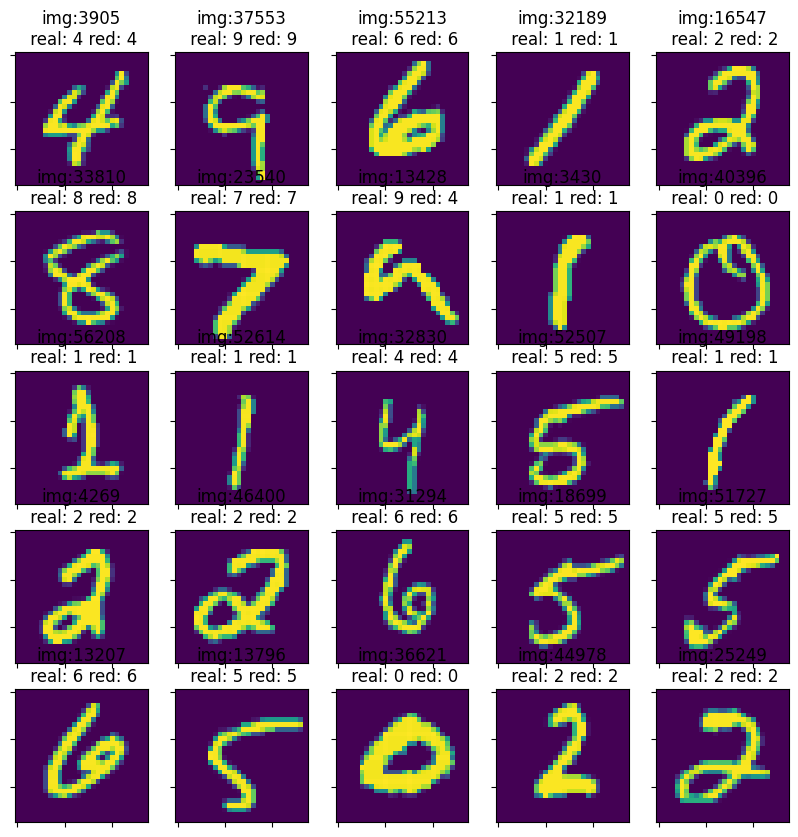

In [14]:
# Veamos algunas predicciones
h = 5
w = 5

fig, axs = plt.subplots(h, w, figsize=(2*h,2*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs))
    Xin = X[ex].reshape(1,28*28)
    Ypred = red.predict(Xin).reshape(10)
    lpred = np.argmax(Ypred)

    axs[i,j].set_title("img:" + str(ex) + "\n real: " + str(labs[ex]) + " red: " + str(lpred))
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].grid(False)
    axs[i,j].imshow(imgs[ex])

## Ejercicio 1: ¿Sin normalizar datos?

Elimina la parte del código anterior que normaliza los datos (donde dividimos por 255) y mira qué le pasa al entrenamiento. No tiene que escribir nuevo código, sólo saca esa parte y reentrena  la red (debes crear otra vez la red, compilarla y luego  hacer `fit`)

Respuesta: Sin normalización de datos a 255, las predicciones son muy malas.

## Ejercicio 2: Entrenando por más épocas

Entrena la red, esta vez por más épocas (pueba con 20 o 30). Para comenzar el entrenamiento desde 0 otra vez, debes reconstruir la red y luego ejecutar `.compile` otra vez (puedes copiar el código de arriba). Luego del entrenamiento, imprime la historia y compáralo con el resultado anterior.

Hazle cambios a la red o al entrenamiento para intentar mejorar aun más el acierto. Comenta con tus compañeros qué cambios podrían dar buenos resultados y pruébalos ¿Hasta qué acierto puedes llegar?

(IMPORTANTE: No olvides normalizar el input de la red otra vez)

In [24]:
# Reconstruimos y recompilamos la red

h1 = 64
h2 = 32

red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

# Acá empieza tu código para entrenamiento  (~3 líneas)
h = red.fit(X, Y, epochs=30, batch_size=20)
# Acá termina tu código

Epoch 1/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7527 - loss: 0.8957
Epoch 2/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9215 - loss: 0.2744
Epoch 3/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9378 - loss: 0.2152
Epoch 4/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9479 - loss: 0.1783
Epoch 5/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9560 - loss: 0.1525
Epoch 6/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9614 - loss: 0.1334
Epoch 7/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9656 - loss: 0.1186
Epoch 8/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9692 - loss: 0.1069
Epoch 9/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9722 - loss: 0.0973
Epoch 10/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9747 - loss: 0.0892
Epoch 11/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9765 - loss: 0.0823
Epoch 12/30
3000/3000 ━━━━

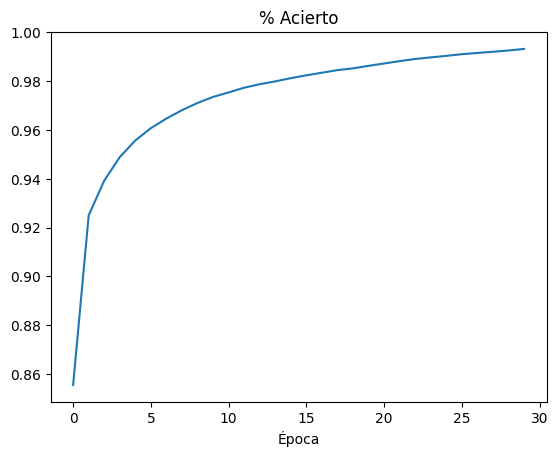

In [25]:
# Imprime el porcentaje de acierto para cada época

# Acá empieza tu código  (~5 líneas)
plt.plot(h.history['accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()

# Acá termina tu código

# CIFAR10: Entrenando con datos mas complejos

Entrenaremos una red para aprender los datos de [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html). Este es un conjunto de 50.000 imágenes de entrenamiento etiquetadas en 10 clases (0:avión, 1:automobil, 2:pájaro, 3:gato, 4:venado, 5:perro, 6:rana, 7:caballo, 8:barco, 9:camión).

Comenzaremos cargando los datos y mostrando algunos ejemplos

In [26]:
(imgs,labs), _ = keras.datasets.cifar10.load_data()
print(imgs.shape)
print(labs.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
(50000, 32, 32, 3)
(50000, 1)


In [27]:
# Lista de nombres para usar como etiquetas

nombres = ['avión', 'auto', 'pájaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camión']

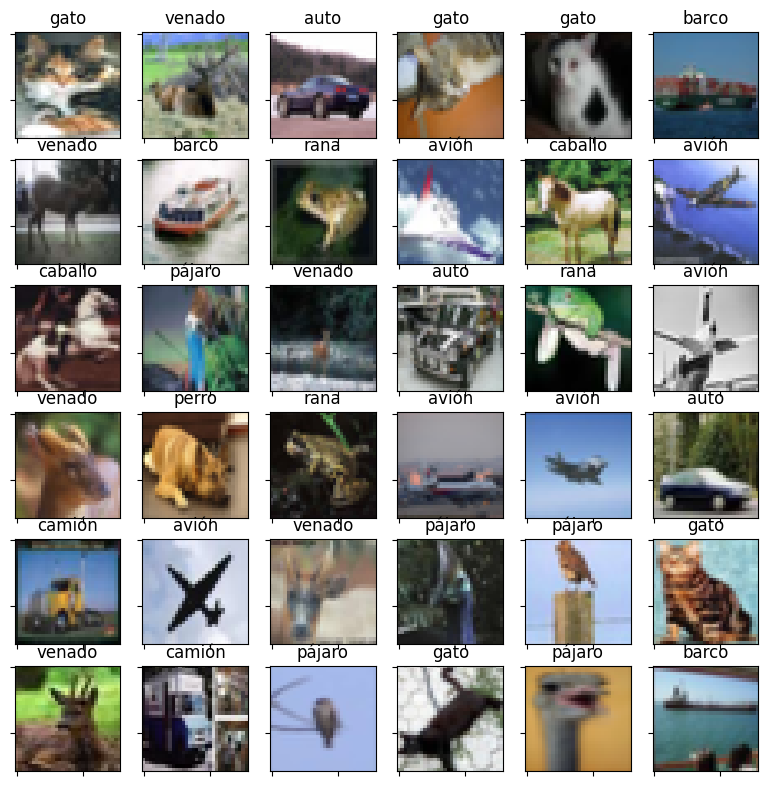

In [28]:
# Mostramos una grilla de ejemplos (al azar)

h = 6 # alto de la grilla
w = 6 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs))
    axs[i,j].set_title(nombres[labs[ex][0]])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(imgs[ex])

In [29]:
# los X's los cambiamos a vectores de una dimension
# y luego normalizamos
X = imgs.reshape(50000,32*32*3)
X = X / 255
print(X.shape)

# los Y's los cambiamos a vecotres de 10 componentes (one-hot)
Y = keras.utils.to_categorical(labs, 10)
print(Y.shape)

(50000, 3072)
(50000, 10)


In [30]:
# cantidad de ejemplos, neuronas de entrada y neuronas de salida

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M,N,C)

50000 3072 10


##  Ejercicio 3: Entrenando con CIFAR10

Ahora usa todo lo que  has aprendido para crear una red y  entrenar con los datos de CIFAR10. Trata de crear una red que alcance al menos unn  55% de acierto en los datos de entrenamiento. Esta parte requiere bastante más código! Al finalizar muestra  una grilla con las predicciones de tu red.

In [31]:
# Crea la red, compílala, entrénala, muestra el acierto por época
# y finalmente muestra ejemplos de las predicciones

# tamaños de capas escondidas

h1 = 128
h2 = 64

In [32]:
# nuestra red feed-forward

red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

red.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Ahora compilamos la red para poder entrenar (con .compile)
# Necesitamos definir
#   - la pérdica ("loss"), en nuestro caso, "categorical_crossentropy"
#   - el algoritmo de optimización ("optimizer"), en nuestro caso "sgd"
# También podemos agregar una lista de métrics ("metrics").
# Agregamos "accuracy"

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [34]:
# Entrenamos simplemente haciendo .fit y entregando los inputs
# Podemos definir también la cantidad de épocas ("epochs"),
# el tamaño del paquete de entrenamiento ("batch_size"),
# y otros parámetros que veremos más adelante.
# Guardamos el resultado en una variable para analizar.
#5 epocas por default
h = red.fit(X, Y, epochs=50, batch_size=50)

Epoch 1/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2519 - loss: 2.0639
Epoch 2/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3624 - loss: 1.7927
Epoch 3/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4002 - loss: 1.7040
Epoch 4/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4210 - loss: 1.6444
Epoch 5/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4331 - loss: 1.5994
Epoch 6/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4469 - loss: 1.5633
Epoch 7/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4568 - loss: 1.5325
Epoch 8/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4657 - loss: 1.5058
Epoch 9/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4758 - loss: 1.4822
Epoch 10/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4830 - loss: 1.4602
Epoch 11/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4908 - loss: 1.4405
Epoch 12/50
1000/1000 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


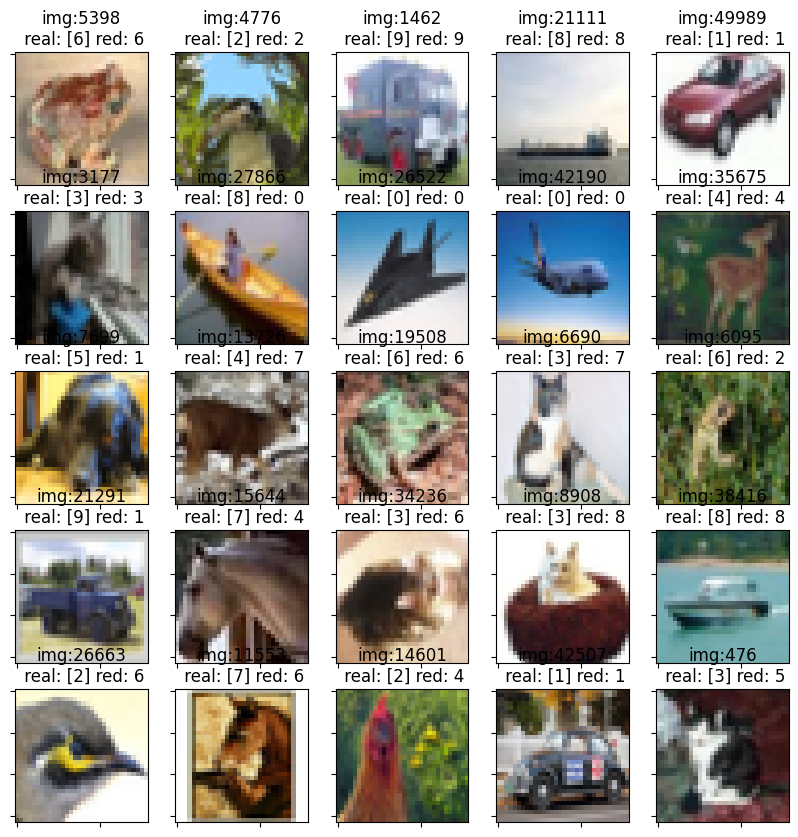

In [35]:
# Veamos algunas predicciones
h = 5
w = 5

fig, axs = plt.subplots(h, w, figsize=(2*h,2*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs))
    Xin = X[ex].reshape(1,32*32*3)
    Ypred = red.predict(Xin).reshape(10)
    lpred = np.argmax(Ypred)

    axs[i,j].set_title("img:" + str(ex) + "\n real: " + str(labs[ex]) + " red: " + str(lpred))
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].grid(False)
    axs[i,j].imshow(imgs[ex])